<a href="https://colab.research.google.com/github/toshanitiwari/toshanitiwari/blob/main/House_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).csv to archive (3).csv


In [ ]:
data = pd.read_csv('archive (3).csv')
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
data.shape

(2930, 82)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
data = data.drop(columns=["Order", "PID"])



In [ ]:
features = [
    "Overall Qual",
    "Gr Liv Area",
    "Total Bsmt SF",
    "Garage Cars",
    "Garage Area",
    "Year Built",
    "Full Bath",
    "TotRms AbvGrd",
    "Neighborhood"
]

target = "SalePrice"

data = data[features + [target]]



In [ ]:
# Numerical → median
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Categorical → mode
cat_cols = data.select_dtypes(include=["object"]).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])



In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [ ]:
X = data_encoded.drop("SalePrice", axis=1)
y = data_encoded["SalePrice"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 36341.02267893525
R2 Score: 0.8352775760454534


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [ ]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


RMSE: 291168.18166214536
R2 Score: -0.08971962207316997


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


RMSE: 290842.0410770566
R2 Score: -0.08727977615025528


In [ ]:
y.describe()


,Price
count,2000.000000
mean,537676.855000
std,276428.845719
min,50005.000000
25%,300098.000000
50%,539254.000000
75%,780086.000000
max,999656.000000


In [ ]:
import pandas as pd

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coefficients


,Feature,Coefficient
3,Floors,19148.405610
2,Bathrooms,-10714.207403
8,Condition_Fair,10620.734920
7,Location_Urban,-5484.313686
9,Condition_Good,-5440.814630
6,Location_Suburban,4858.400472
4,YearBuilt,4222.684673
10,Condition_Poor,1778.232367
11,Garage_Yes,1185.205708
0,Area,-748.906099


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [ ]:
y_pred_ridge = ridge.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge RMSE:", rmse_ridge)
print("Ridge R2 Score:", r2_ridge)


Ridge RMSE: 36331.47986195276
Ridge R2 Score: 0.8353640738621654


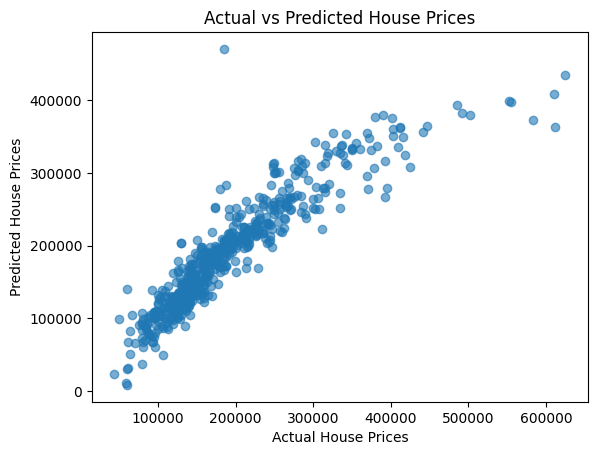

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
# Take one house from test set
sample_house = X_test.iloc[0:1]

# Predict price
predicted_price = rf.predict(sample_house)

print("Predicted House Price:", int(predicted_price[0]))
print("Actual House Price:", int(y_test.iloc[0]))


Predicted House Price: 175972
Actual House Price: 161000


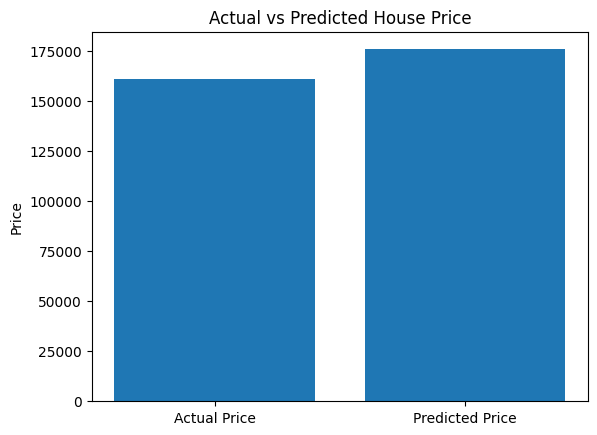

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(["Actual Price", "Predicted Price"],
        [y_test.iloc[0], predicted_price[0]])
plt.ylabel("Price")
plt.title("Actual vs Predicted House Price")
plt.show()


In [ ]:
sample_input = X.mean().to_frame().T
sample_input['Gr Liv Area'] = 1800
sample_input['Overall Qual'] = 7
sample_input['Total Bsmt SF'] = 900

predicted_price = rf.predict(sample_input)

print("Predicted House Price:", int(predicted_price[0]))


Predicted House Price: 187611
